In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = '../logs_dir/patient219_cal/'
p219_VD = np.load(path+'patient219_thesis.npy')

data_path = '../datasets/ataxia_reduc/data.npy'
mask_path = '../datasets/ataxia_reduc/mask.npy'
data = np.load(data_path, allow_pickle=True).astype(float)
mask = np.load(mask_path, allow_pickle=True)
data[np.nonzero(mask)] = np.nan

true219 = data[219,:,:]

predictor  0


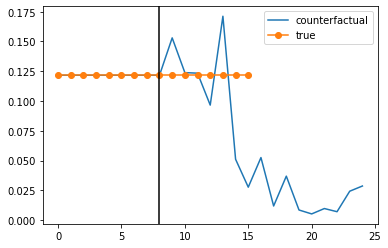

predictor  1


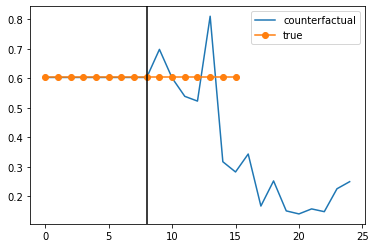

predictor  2


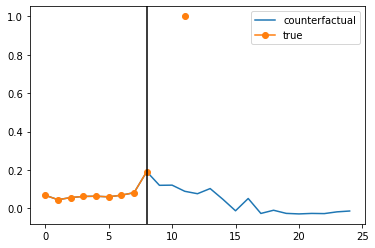

predictor  3


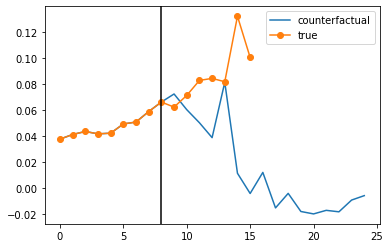

predictor  4


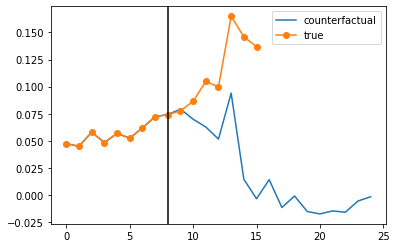

predictor  5


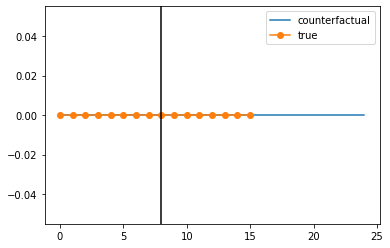

predictor  6


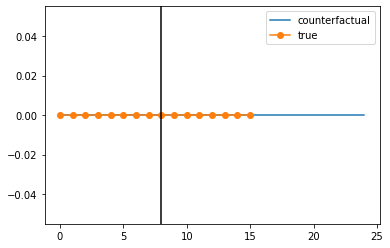

predictor  7


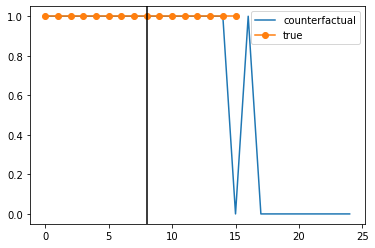

predictor  8


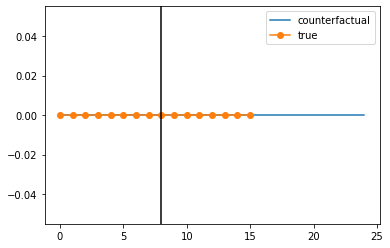

predictor  9


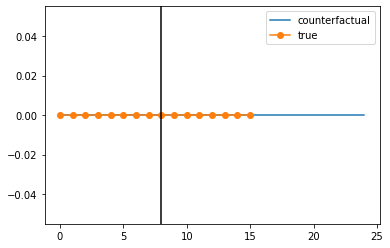

predictor  10


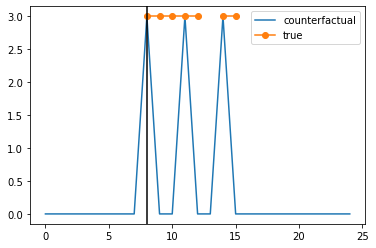

predictor  11


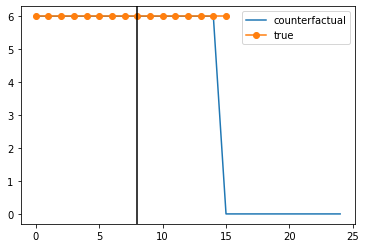

predictor  12


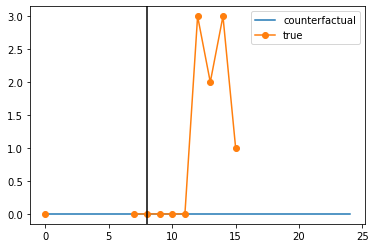

predictor  13


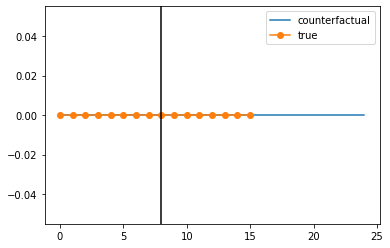

predictor  14


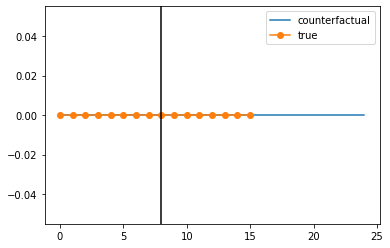

predictor  15


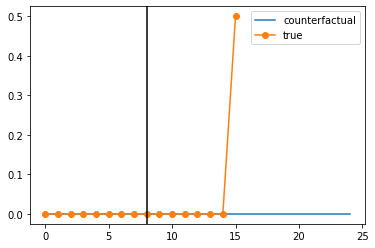

predictor  16


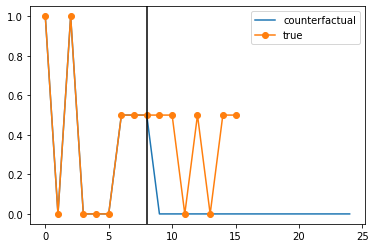

predictor  17


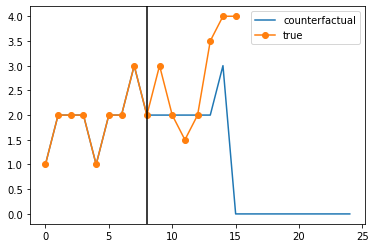

predictor  18


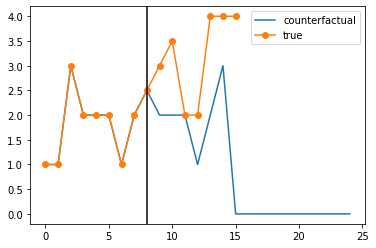

predictor  19


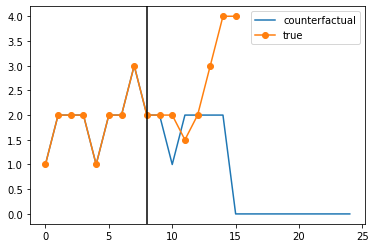

predictor  20


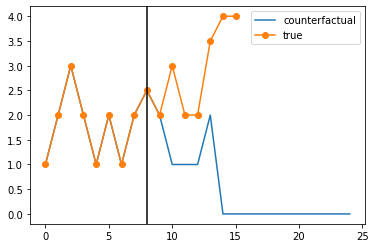

predictor  21


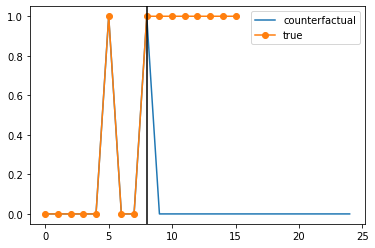

predictor  22


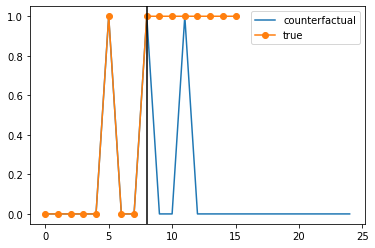

predictor  23


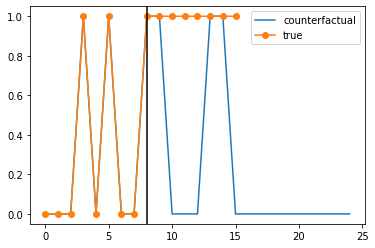

predictor  24


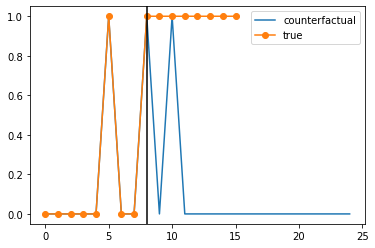

predictor  25


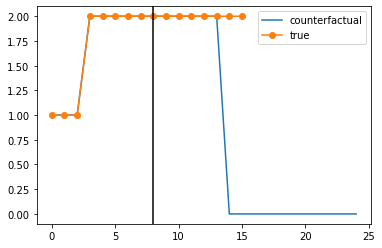

predictor  26


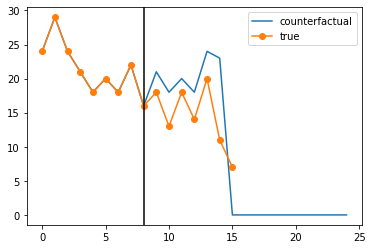

predictor  27


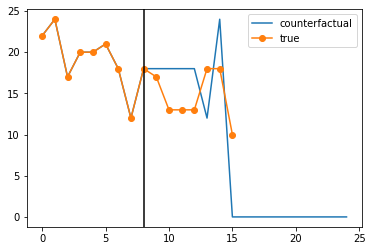

predictor  28


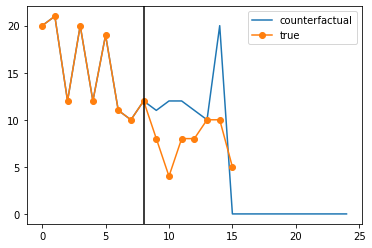

predictor  29


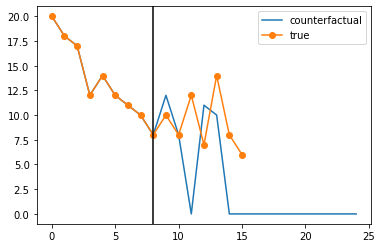

predictor  30


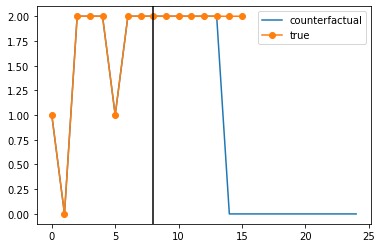

predictor  31


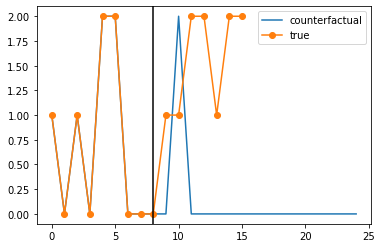

predictor  32


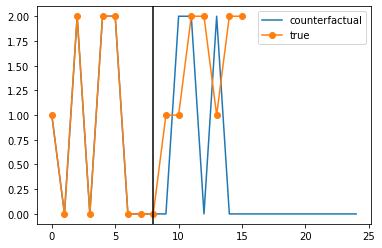

predictor  33


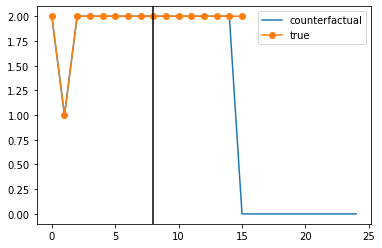

predictor  34


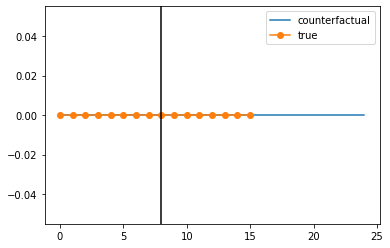

predictor  35


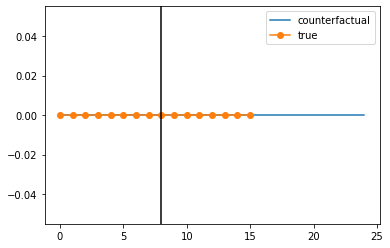

predictor  36


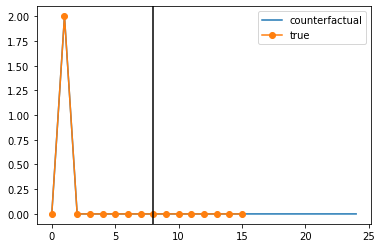

predictor  37


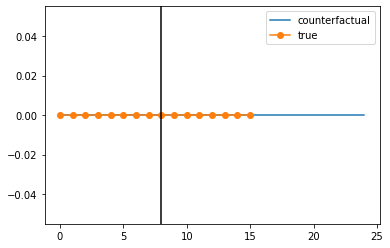

predictor  38


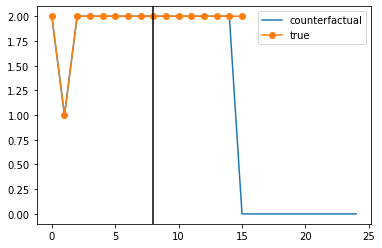

predictor  39


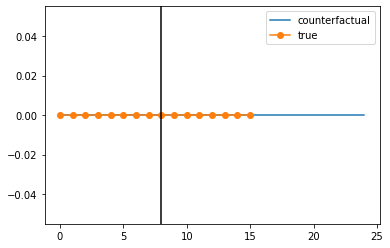

predictor  40


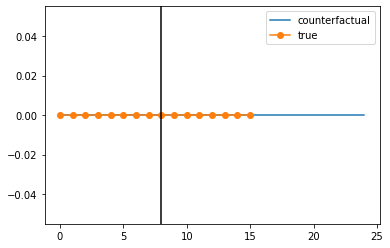

predictor  41


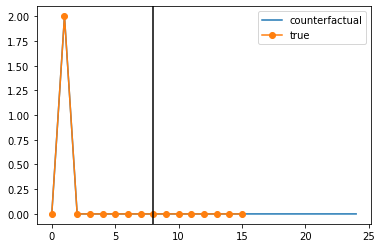

predictor  42


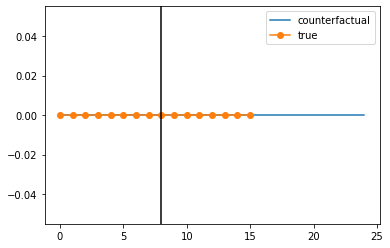

predictor  43


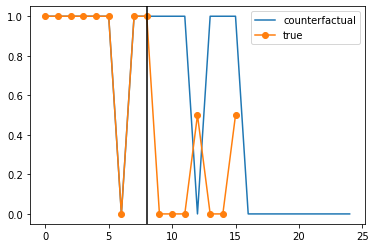

predictor  44


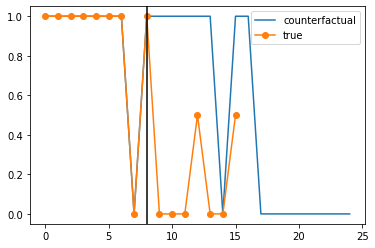

predictor  45


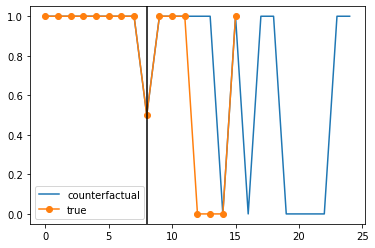

predictor  46


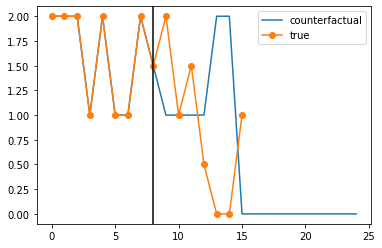

predictor  47


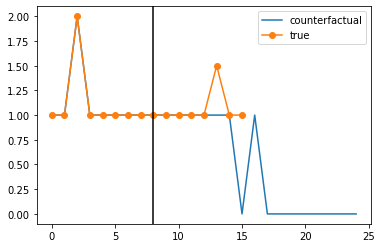

predictor  48


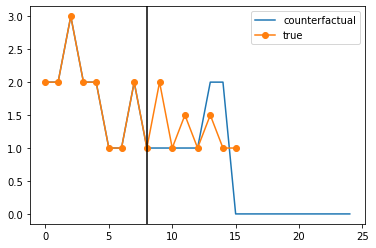

predictor  49


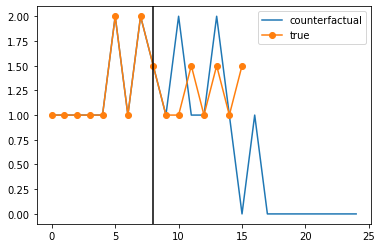

predictor  50


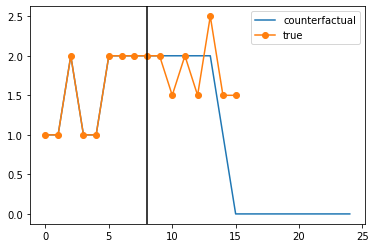

predictor  51


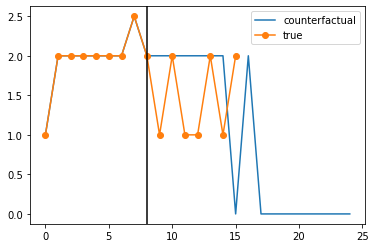

predictor  52


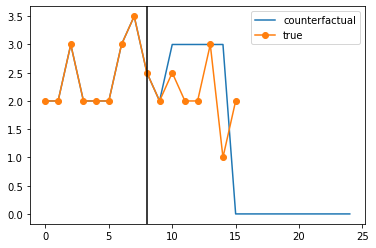

predictor  53


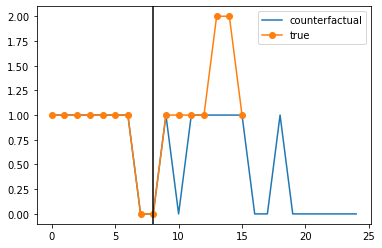

predictor  54


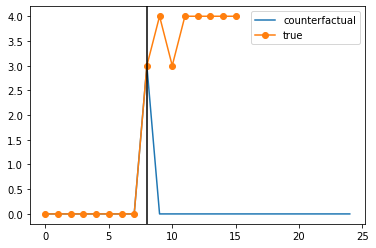

predictor  55


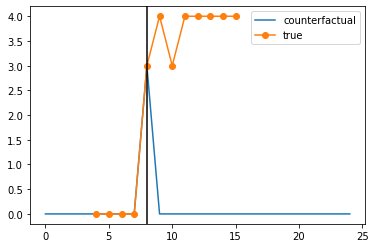

predictor  56


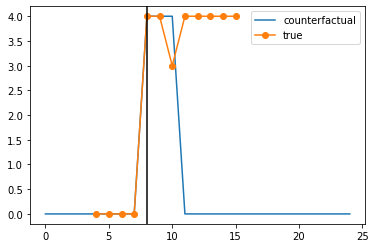

predictor  57


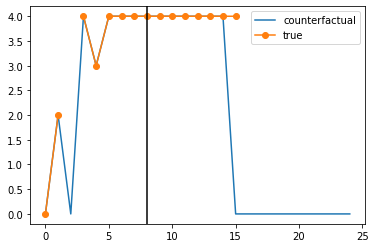

predictor  58


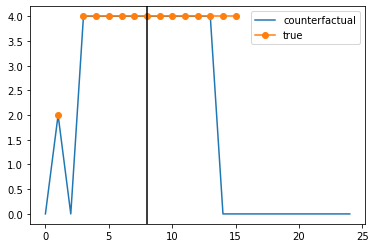

predictor  59


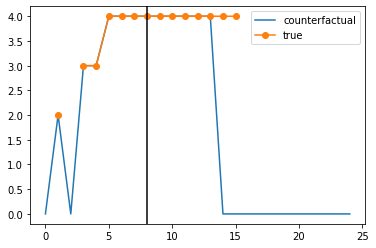

predictor  60


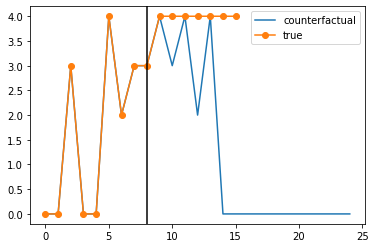

predictor  61


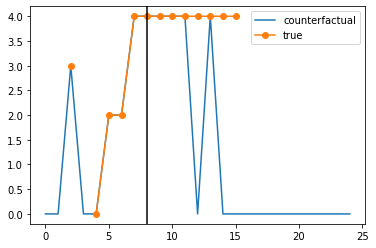

predictor  62


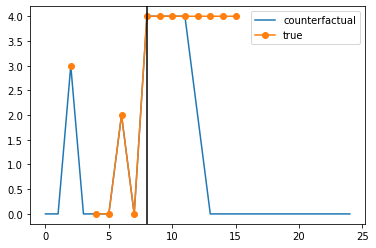

predictor  63


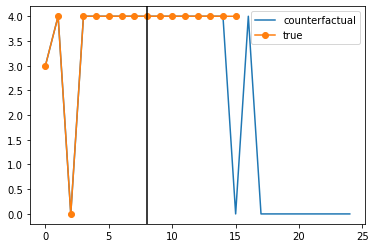

predictor  64


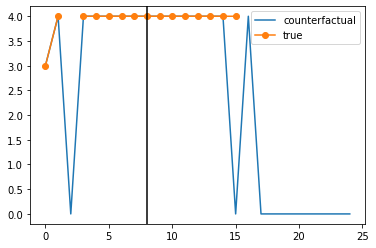

predictor  65


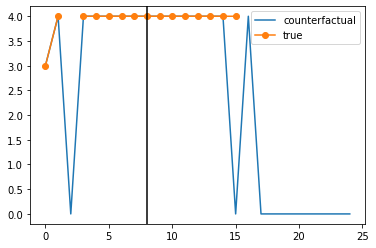

predictor  66


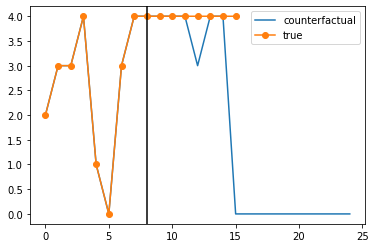

predictor  67


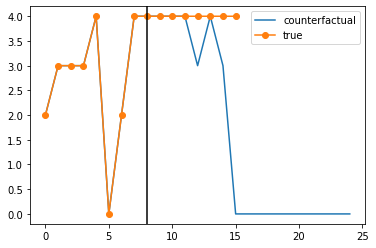

predictor  68


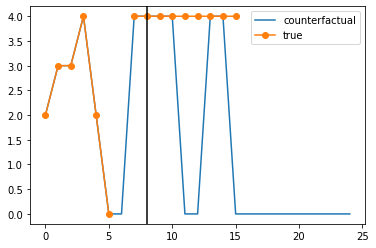

predictor  69


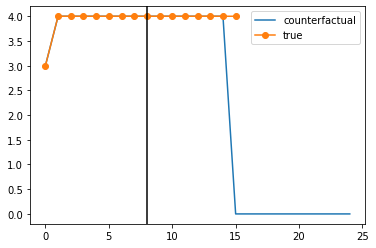

predictor  70


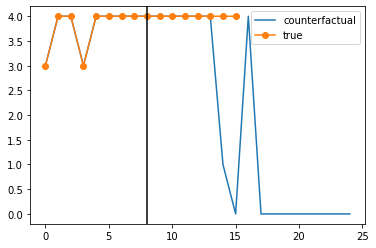

predictor  71


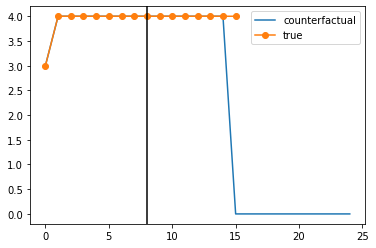

predictor  72


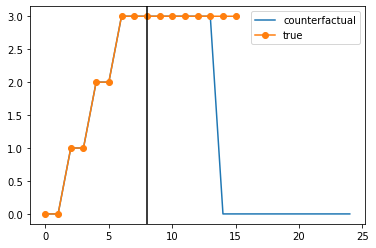

predictor  73


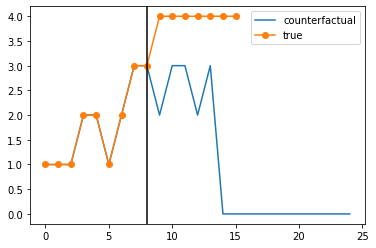

predictor  74


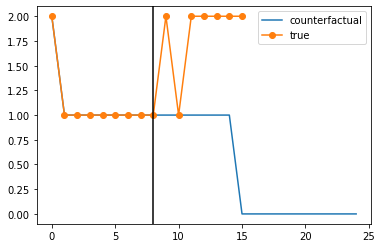

predictor  75


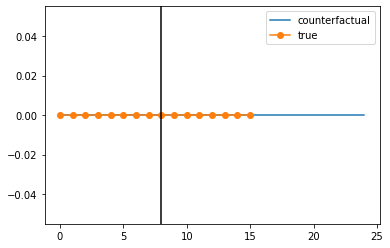

predictor  76


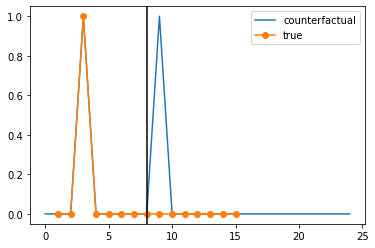

predictor  77


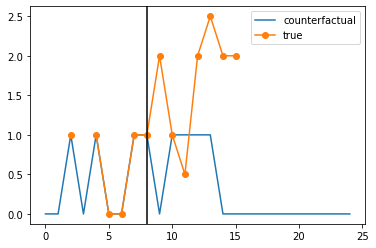

predictor  78


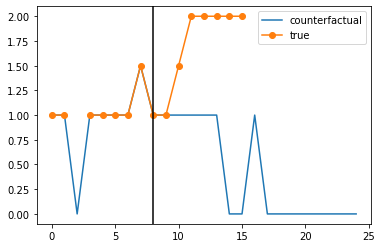

predictor  79


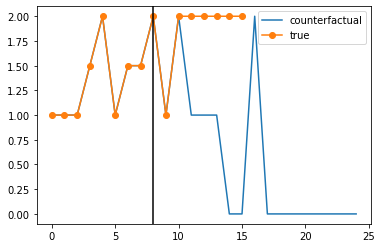

predictor  80


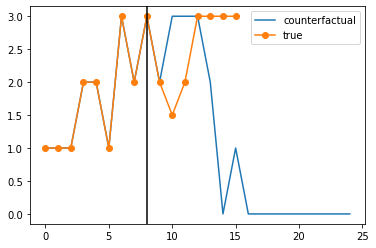

predictor  81


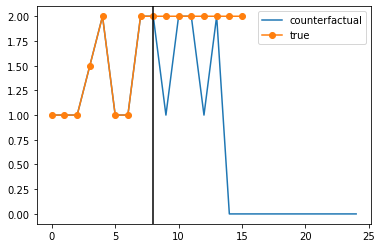

predictor  82


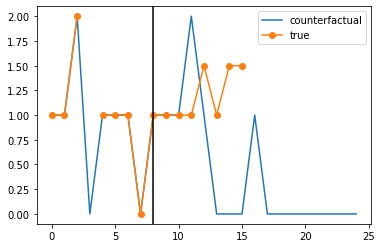

predictor  83


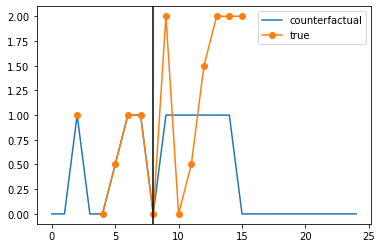

predictor  84


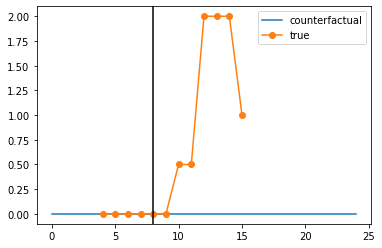

predictor  85


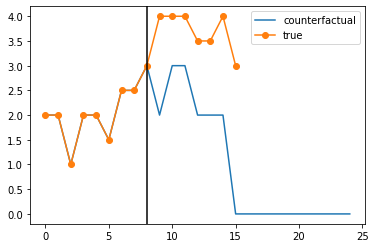

predictor  86


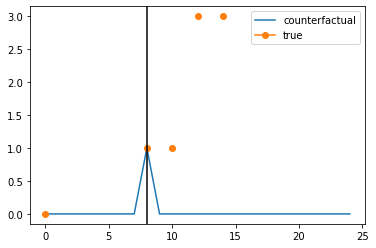

predictor  87


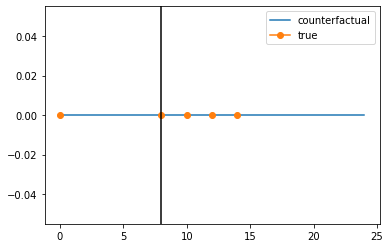

predictor  88


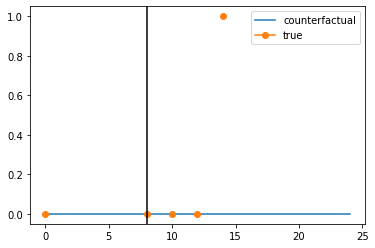

predictor  89


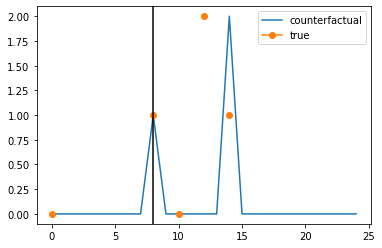

predictor  90


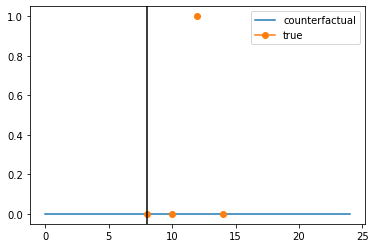

predictor  91


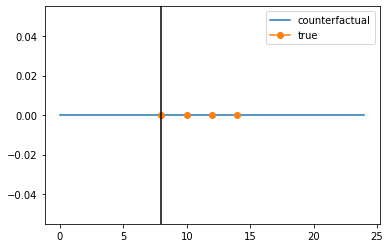

predictor  92


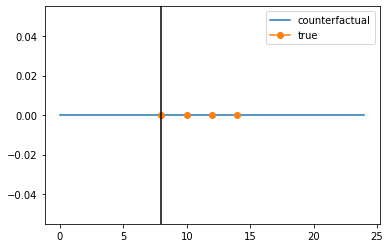

predictor  93


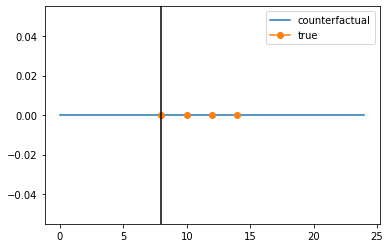

predictor  94


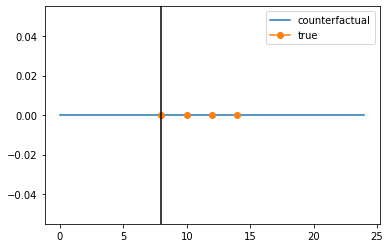

predictor  95


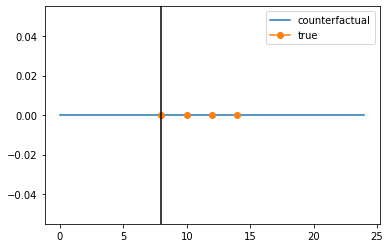

predictor  96


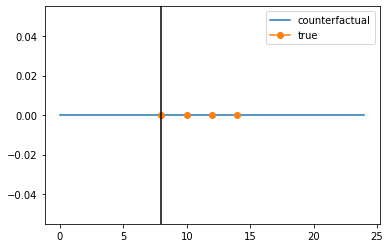

predictor  97


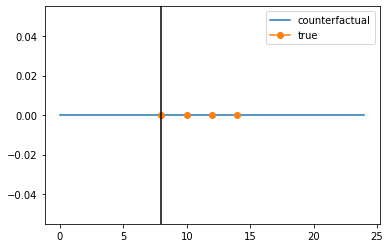

predictor  98


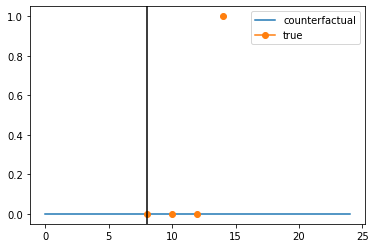

predictor  99


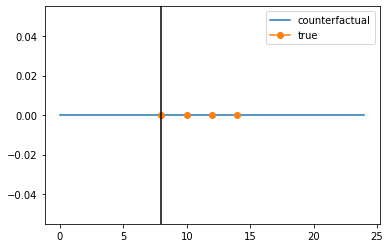

predictor  100


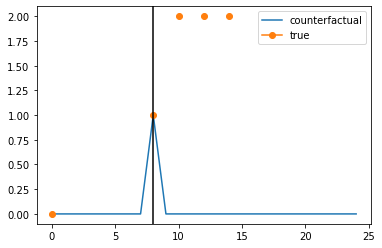

predictor  101


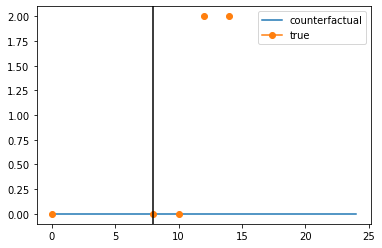

predictor  102


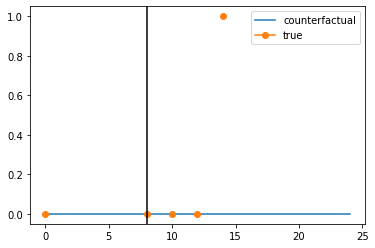

predictor  103


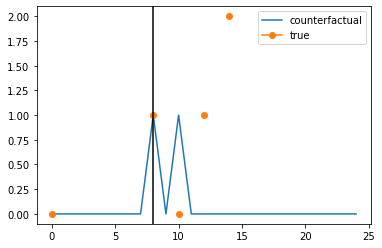

predictor  104


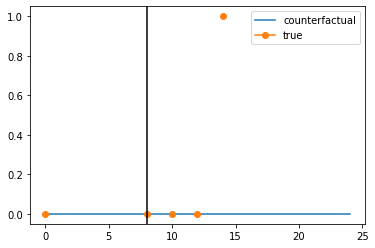

predictor  105


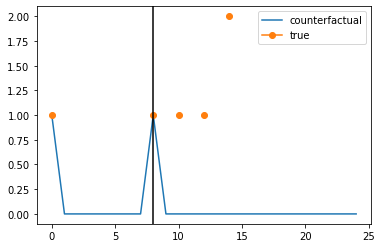

predictor  106


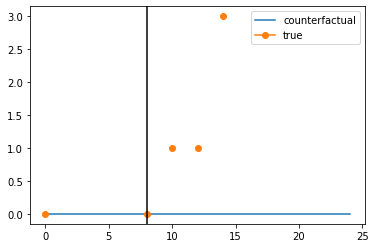

predictor  107


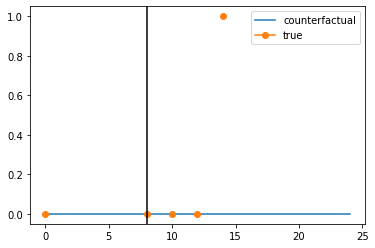

predictor  108


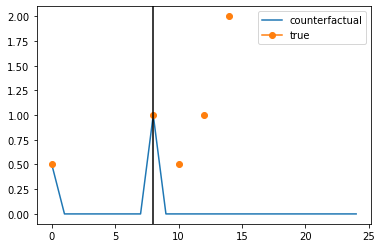

predictor  109


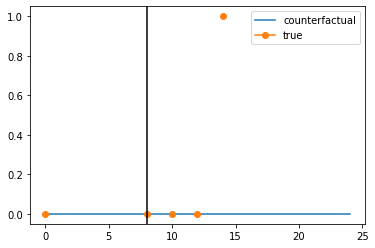

predictor  110


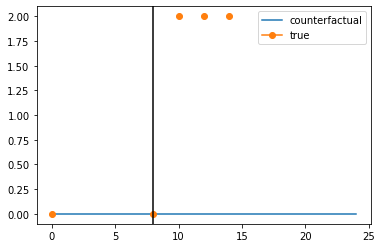

predictor  111


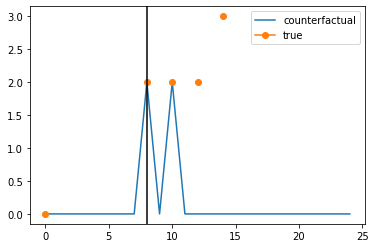

predictor  112


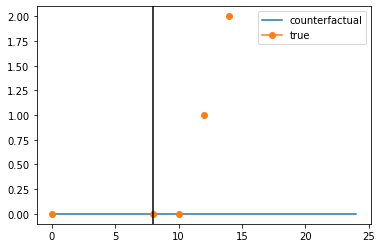

predictor  113


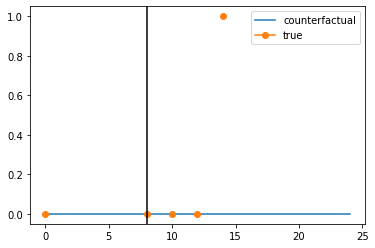

predictor  114


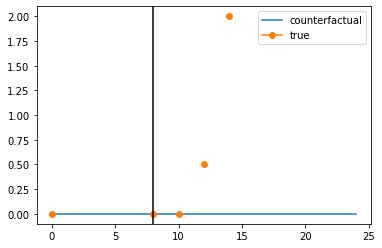

predictor  115


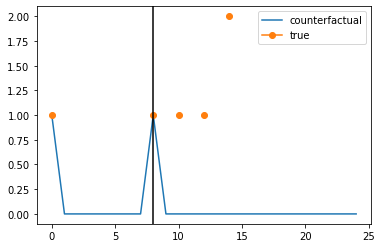

predictor  116


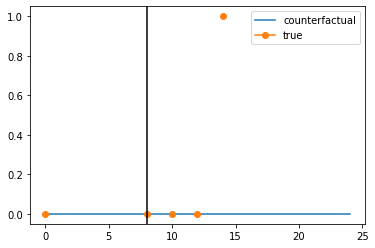

predictor  117


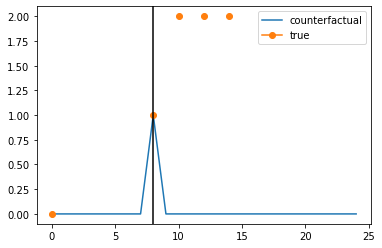

predictor  118


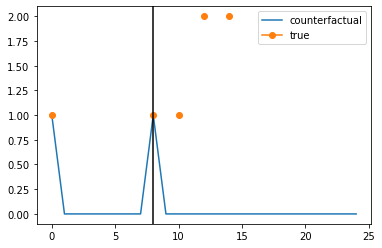

predictor  119


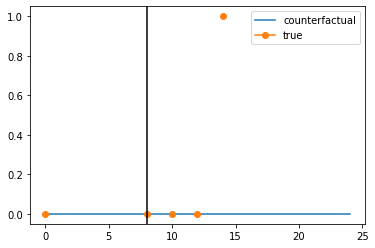

predictor  120


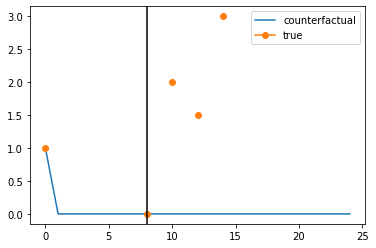

predictor  121


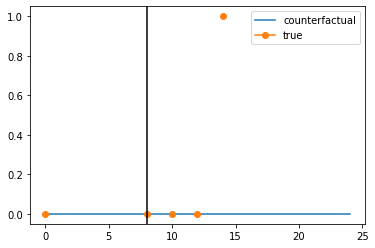

predictor  122


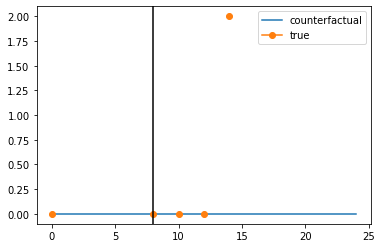

predictor  123


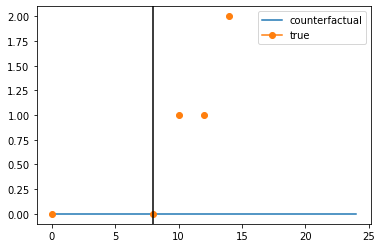

predictor  124


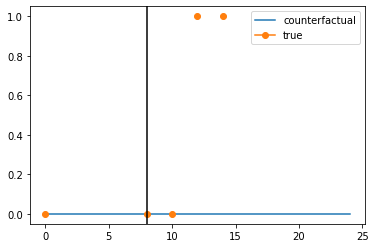

predictor  125


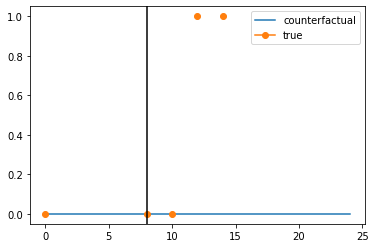

predictor  126


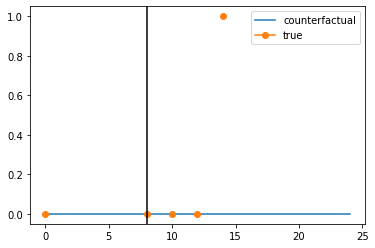

predictor  127


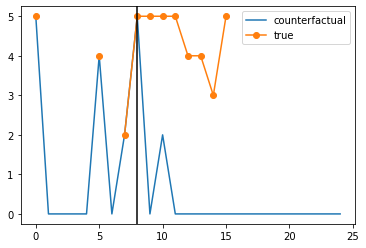

predictor  128


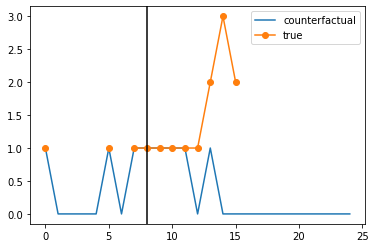

predictor  129


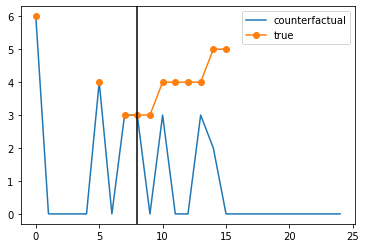

predictor  130


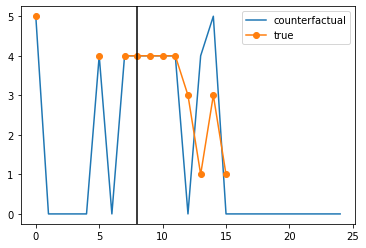

predictor  131


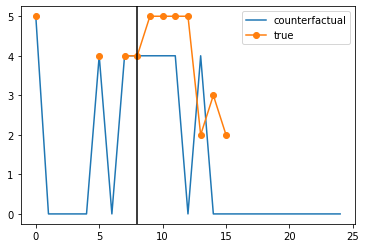

predictor  132


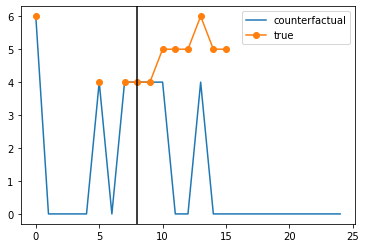

predictor  133


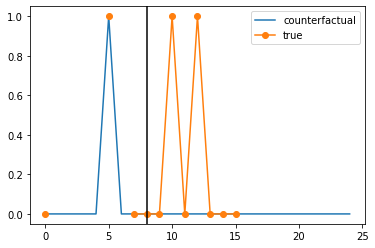

predictor  134


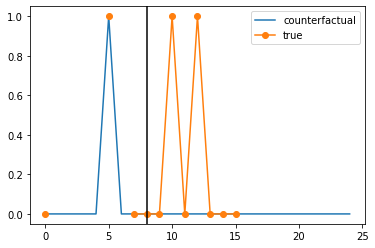

predictor  135


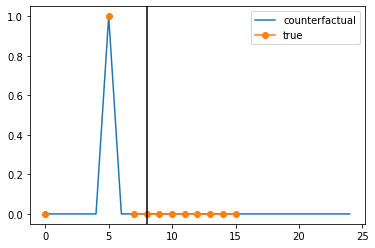

predictor  136


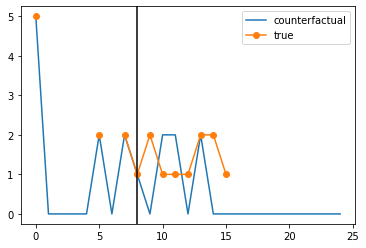

predictor  137


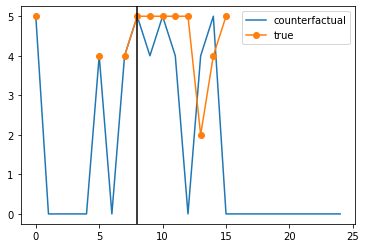

predictor  138


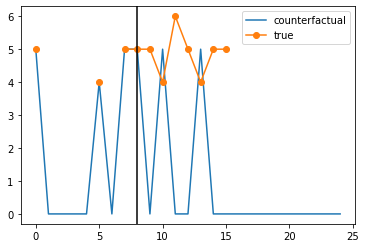

predictor  139


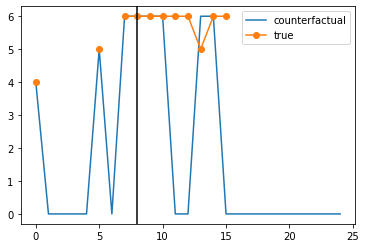

predictor  140


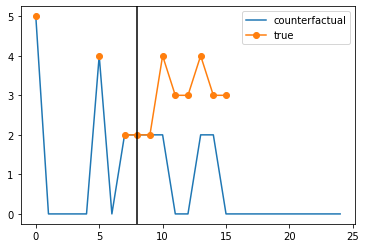

predictor  141


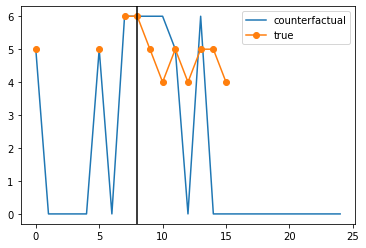

predictor  142


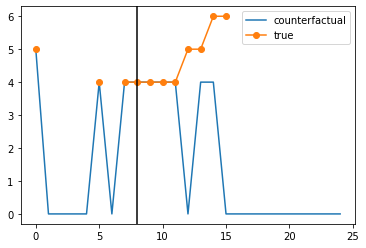

predictor  143


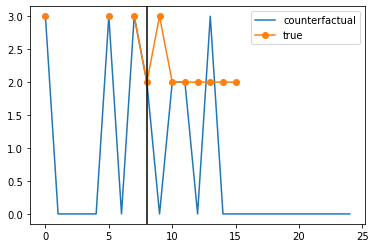

predictor  144


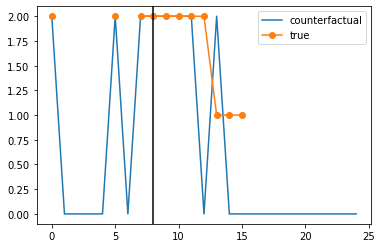

predictor  145


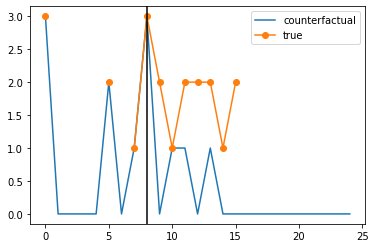

predictor  146


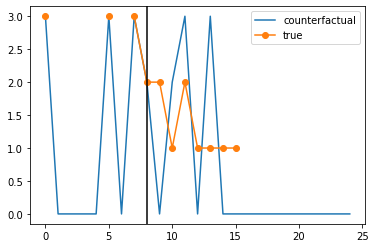

predictor  147


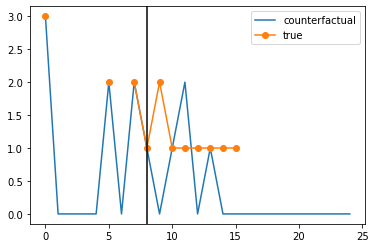

predictor  148


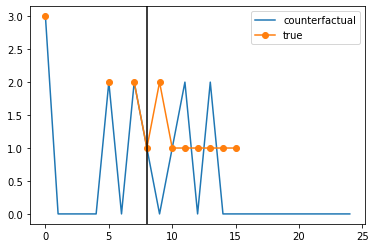

predictor  149


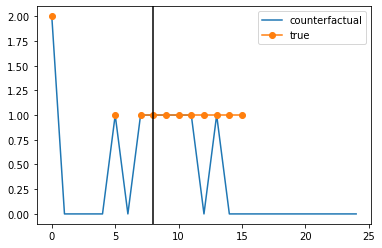

predictor  150


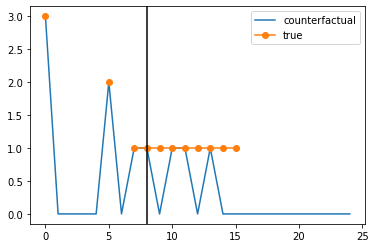

predictor  151


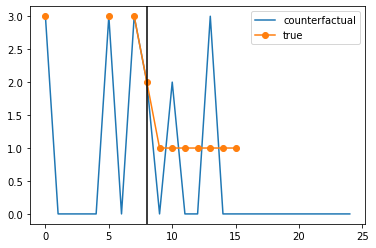

predictor  152


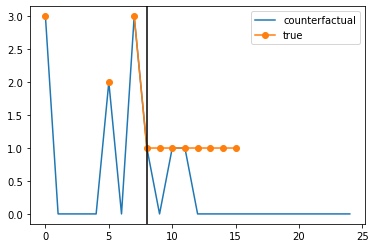

predictor  153


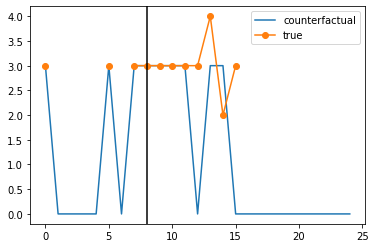

predictor  154


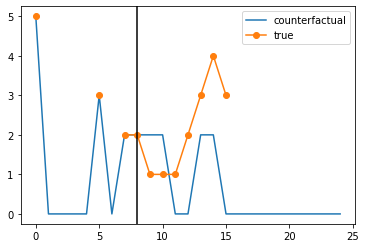

predictor  155


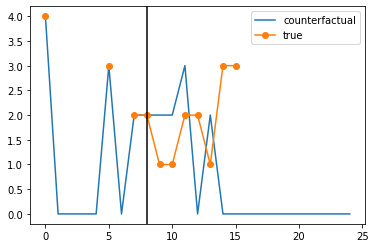

predictor  156


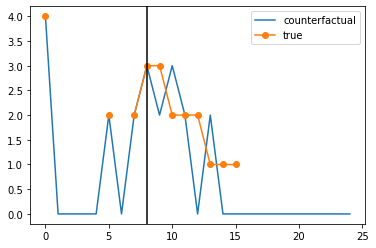

predictor  157


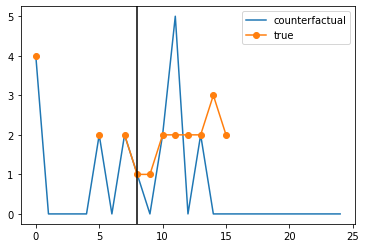

predictor  158


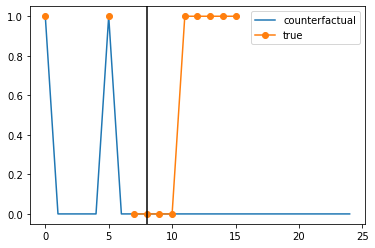

predictor  159


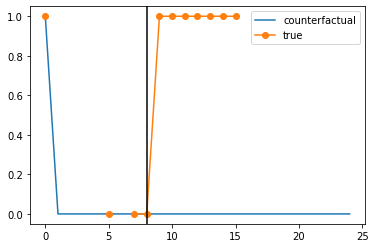

predictor  160


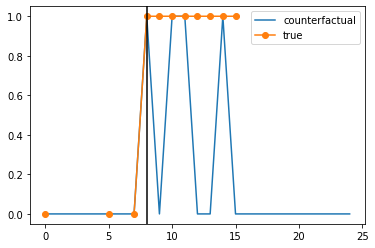

predictor  161


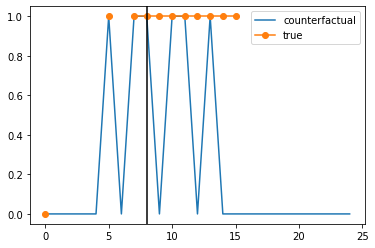

predictor  162


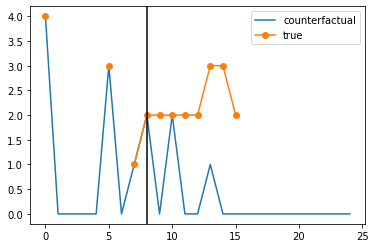

In [3]:
metric_name = ['age','gaa_len','ppm','death_flag','ethnicity','sex','race',
               'assistive device type','level of education','living cirucmstances','FARSn','']
for predictor_ix in range(163):
    print('predictor ', predictor_ix)
    plt.plot(p219_VD[4:,predictor_ix], label='counterfactual')
    plt.plot(true219[:,predictor_ix].astype(float), 'o-',label='true')
    plt.axvline(8, c='black')
    plt.legend()
    plt.show()